# Bike Sharing Demand
This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.


### 1. Install Packages and Data Inspection and Cleaning
Install packages and inspect the data set. Find if there are any null values. Using **.isnull() and .sum()** method. And check the data types 

In [114]:
pd.read_csv("data/SeoulBikeData.csv")

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import dataset
bike_df = pd.read_csv("data/SeoulBikeData.csv", parse_dates = ['Date'])

#removed all spaces in column name
bike_df.columns = bike_df.columns.str.replace(' ', '')

#check if there are any null values
print(bike_df.isnull().sum())

#check data types
print(bike_df.dtypes)
bike_df

Date                      0
RentedBikeCount           0
Hour                      0
Temperature(C)            0
Humidity(%)               0
Windspeed(m/s)            0
Visibility(10m)           0
Dewpointtemperature(C)    0
SolarRadiation(MJ/m2)     0
Rainfall(mm)              0
Snowfall(cm)              0
Seasons                   0
Holiday                   0
FunctioningDay            0
dtype: int64
Date                      datetime64[ns]
RentedBikeCount                    int64
Hour                               int64
Temperature(C)                   float64
Humidity(%)                        int64
Windspeed(m/s)                   float64
Visibility(10m)                    int64
Dewpointtemperature(C)           float64
SolarRadiation(MJ/m2)            float64
Rainfall(mm)                     float64
Snowfall(cm)                     float64
Seasons                           object
Holiday                           object
FunctioningDay                    object
dtype: object


,Date,RentedBikeCount,Hour,Temperature(C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,FunctioningDay
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### 2. Coverage of the data set
What date min date and max date of the data set?

December 12, 2017 to November 12, 2018

In [116]:
print(bike_df['Date'].min())
print(bike_df['Date'].max())
# The coverage of the data set is from December 1, 2017 to November 12, 2018


2017-01-12 00:00:00
2018-12-11 00:00:00


### 3. Demand of bikes per hour in normal day and holiday

As we can see, they have the same peak hours, 0000H, 0800H, and 1800H. Comparing the two graphs, the holiday graph have a continuous increasing from 0500H to 1800H. While the normal day graph have a decrease from 0800H to 1000H but it will continue to increase until 1800H.

And also, the total ride bike in Holiday is **215,895** and the total ride bike in Normal Day is **5,956,419**

5956419


Text(0, 0.5, 'Rented Bike Count')

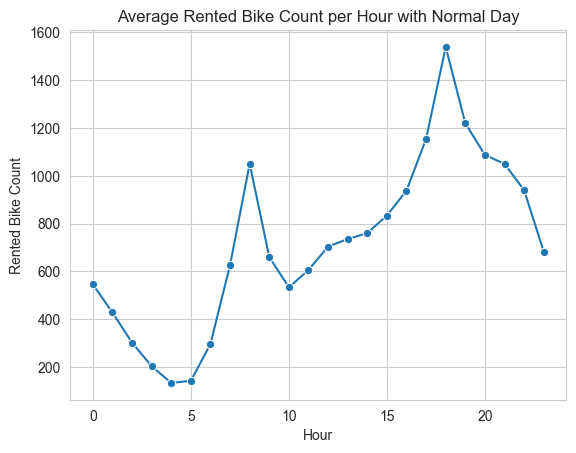

In [24]:
#subset the holiday and normal day and also subset it
#normal day
noholiday = bike_df[bike_df['Holiday'] == 'No Holiday']
print(noholiday['RentedBikeCount'].sum())
total_ride_noholiday = noholiday.groupby('Hour', as_index = False)['RentedBikeCount'].mean()

#plot
sns.set_style('whitegrid')
noholiday_graph = sns.lineplot(data = total_ride_noholiday, x = 'Hour', y = 'RentedBikeCount', marker = 'o')
noholiday_graph.set_title('Average Rented Bike Count per Hour with Normal Day')
noholiday_graph.set_ylabel('Rented Bike Count')

215895


Text(0, 0.5, 'Rented Bike Count')

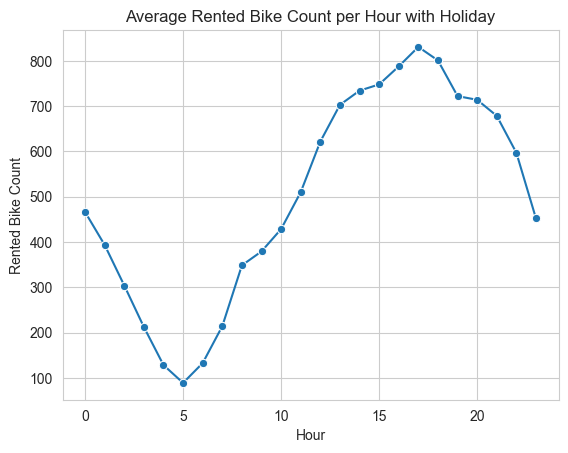

In [30]:
#holiday
holiday = bike_df[bike_df['Holiday'] == 'Holiday']
print(holiday['RentedBikeCount'].sum())
total_ride_holiday = holiday.groupby('Hour', as_index = False)['RentedBikeCount'].mean()

#plot
holiday_graph = sns.lineplot(data = total_ride_holiday, x = 'Hour', y = 'RentedBikeCount', marker = 'o')
holiday_graph.set_title('Average Rented Bike Count per Hour with Holiday')
holiday_graph.set_ylabel('Rented Bike Count')

### 4. Comparing the demand of bike per season
Based on the line graph, we can see the pattern that they also have a same peak hours in different seasons. Summer has the highest total rented bike while Winter has the lowest.

['Autumn' 'Spring' 'Summer' 'Winter']


Text(0, 0.5, 'Rented Bike Count')

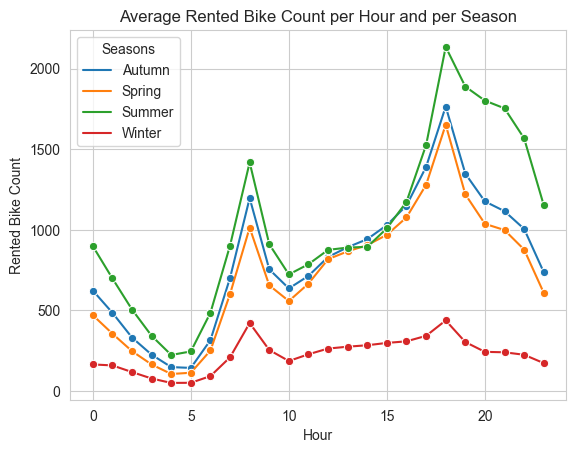

In [72]:
#Print all seasons to know if its equal to 4
print(np.unique(bike_df['Seasons']))

#plot it
seasons_groupby = bike_df.groupby(['Hour', 'Seasons'], as_index = False)['RentedBikeCount'].mean()
seasons_linegraph = sns.lineplot(data = seasons_groupby, 
                                 x = 'Hour', 
                                 y = 'RentedBikeCount', 
                                 hue = 'Seasons', 
                                 marker = 'o')
seasons_linegraph.set_title('Average Rented Bike Count per Hour and per Season')
seasons_linegraph.set_ylabel('Rented Bike Count')


[Text(0.5, 0, '')]

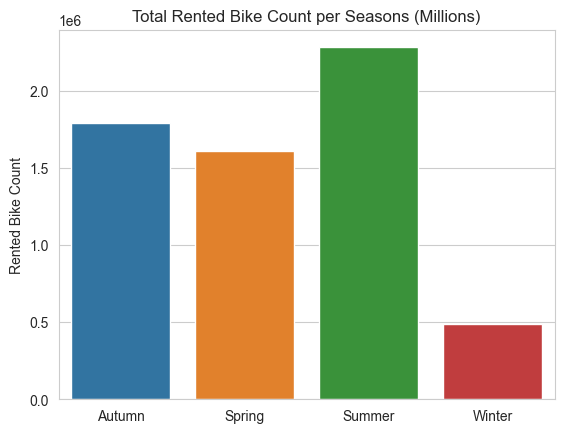

In [73]:
#sum of rented bike counts per season
seasons = bike_df.groupby('Seasons', as_index = False)['RentedBikeCount'].sum()

seasons_bargraph = sns.barplot(data = seasons, 
                               x = 'Seasons', 
                               y = 'RentedBikeCount', 
                               estimator = sum, 
                               errorbar = None)
seasons_bargraph.set_title('Total Rented Bike Count per Seasons (Millions)')
seasons_bargraph.set_ylabel('Rented Bike Count')
seasons_bargraph.set(xlabel = None)

### 5. Temperature affecting the bike business
As we saw in the scatter plot, if the temperature is low, especially in Winter, we have a low volume of costumer.

And we have a **strong positive correlation of 0.54**. Having this correlation means that if the temperature increases, the rented bike count also increases

[[1.         0.53855815]
 [0.53855815 1.        ]]


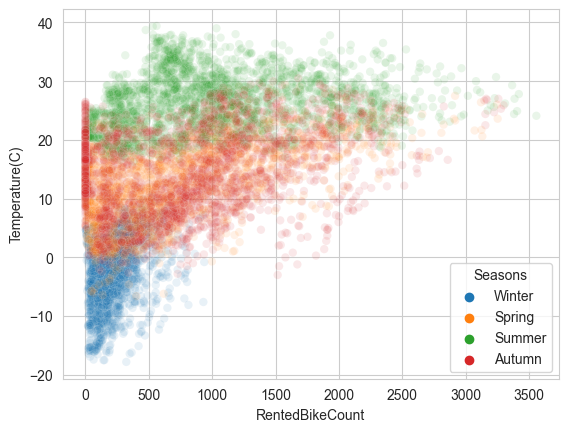

In [66]:
#make a scatter plot with rented bike count vs temperature with hue of seasons
temperature_graph = sns.scatterplot(data = bike_df, 
                                    x = 'RentedBikeCount', 
                                    y = 'Temperature(C)', 
                                    hue = 'Seasons', 
                                    alpha = 0.1)
bike_df_correlate = np.corrcoef(bike_df['Temperature(C)'], bike_df['RentedBikeCount'])
print(bike_df_correlate)

### 5.1 Windspeed vs Rented Bike Count
As we saw in the scatter plot, there are **weak positive correlation 0.12** in windspeed and rented bike count.

[[1.         0.12110845]
 [0.12110845 1.        ]]


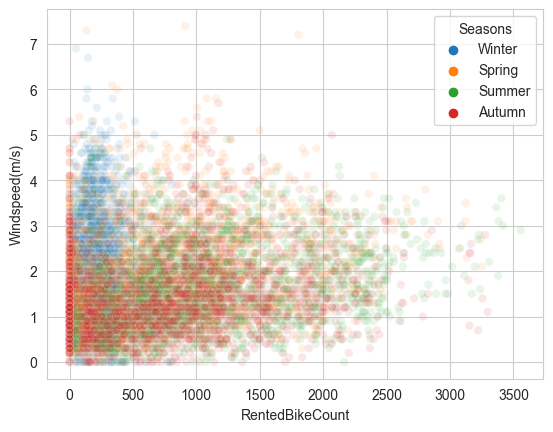

In [69]:
#make a scatter plot with rented bike count vs windspeed
windspeed_scatterplot = sns.scatterplot(data = bike_df, 
                                        x = 'RentedBikeCount', 
                                        y = 'Windspeed(m/s)', 
                                        hue = 'Seasons', 
                                        alpha = 0.1)
windspeed_corr = np.corrcoef(bike_df['RentedBikeCount'], bike_df['Windspeed(m/s)'])
print(windspeed_corr)

### 6. Average Rented Bike Count per Day and per Seasons


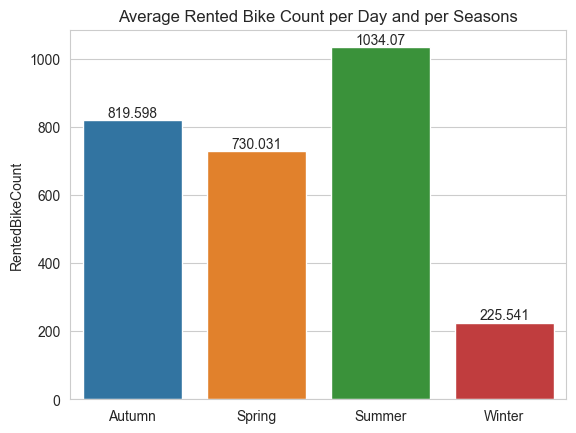

In [75]:
#get the average rented bike per day and per seasons
average_ridebike_seasons = bike_df.groupby('Seasons', as_index = False)['RentedBikeCount'].mean()
averidesea_bargraph = sns.barplot(data = average_ridebike_seasons, 
                                  x = 'Seasons', 
                                  y = 'RentedBikeCount')
averidesea_bargraph.set_title('Average Rented Bike Count per Day and per Seasons')
averidesea_bargraph.set(xlabel = None)
averidesea_bargraph.bar_label(averidesea_bargraph.containers[0])

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 

# END